<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/multi-Untitled20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

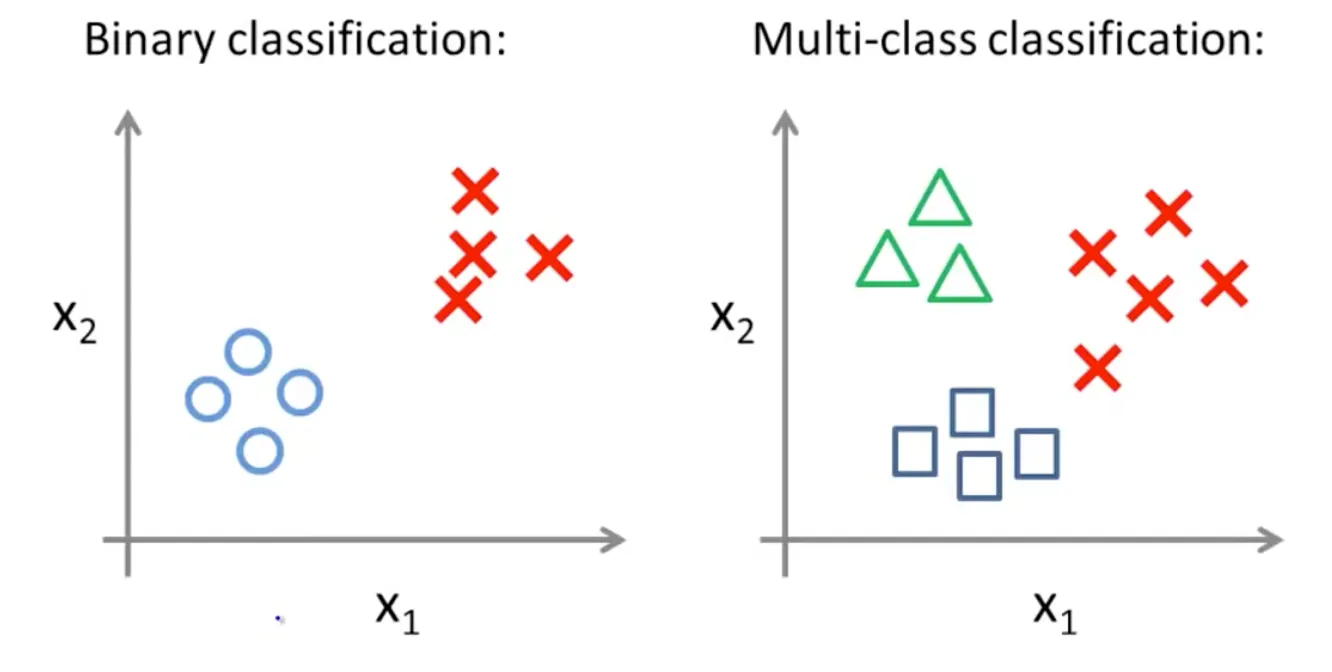

But Let’s begin by understanding what is the idea behind Logistic Regression. “In Logistic regression, by the help of a hypothesis function which is also called as sigmoid function we calculate probabilities by giving some input data(known variables) and based on that, the model does the analysis to predict required classification.” What does this mean ? So if we have some dependent variables like x1,x2,x3.. and we have a function f(X),by using the dependent variables if our function calculates a number which lies between 0 to 1, then we can successfully classify the problem statement. So for a classification problem the basic concept of notation can be interpreted as the target values to be either 0 or 1. i.e. y ∈ {0, 1}. where y = Target or Dependent Variable.

So, if by some means we can find the value of our hypothesis function given X (feature values) in between a range of 0 to 1 then we can successfully classify the data set. So, if hθ​(x) is our Logistic regression function or hypothesis then, hθ​(x) need to satisfy the condition as 0≤ hθ​(x) ≤1. We can achieve the same by using θTX(Theta transpose X) in our Logistic Function.The logistic function can be noted as below:
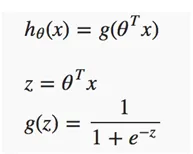

The following image shows us what the sigmoid function(logistic function) looks like:

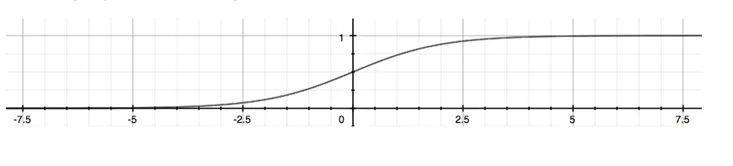

As we see above the g(z) function where z = θTX, will convert all the different valued features (dependent variables) into a number between 0 and 1. This will definitely help us in categorizing the target variables.

As we have mentioned earlier, logistic regression works on probability, so here our function(hθ​(x)) will give us the probability whether or not our output is 1. For example, if hθ​(x) = 0.8 then it says that chances of our output to be 1 is 80%. Hence from this we can deduct, the chances of our output to be 0 is 20%.

In order to get our classification values 0 or 1, we can classify our features by inheriting the following understanding:

If ,hθ(x) ≥ 0.5 → y=1 and If hθ(x) < 0.5 → y=0

So, if our input to ‘g’ is θTX, then that means, if θTX becomes more than 0 then our out probability will be close to 1 and we can classify the output to be 1 and vice versa. This idea can be noted as:

hθ(x) = g(θTX) ≥ 0.5 when θTX ≥ 0

θTX ≥ 0 ⇒y=1

θTX < 0 ⇒y=0

The decision boundary is the line that separates the area where y = 0 and where y = 1. It is created by our hypothesis function.

Cost Function:

The main objective of our model should be to find out the weights i.e . θ values.In order to find out the θ values we need a function (let’s call it cost function) and minimize it’s value by using different values of θ. The weights that will minimize the cost function will be our best suited weights. In Logistic regression we need to select a function which will be a convex function so that we can find out the local optima accordingly.

cost function for logistic regression looks like:



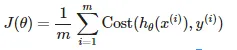

In [ ]:
#We are importing all necessary libraries to implement our model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

class LogisticRegression(object):

    def __init__(Logreg, alpha=0.01, n_iteration=100):  #This function intializes the alpha value and iteration
        Logreg.alpha = alpha                            #value in the object
        Logreg.n_iter = n_iteration

    def _sigmoid_function(Logreg, x): #This function is resonsible for calculating the sigmoid value with given parameter
        value = 1 / (1 + np.exp(-x))
        return value
    def _cost_function(Logreg,h,theta, y): # The fuctions calculates the cost value
        m = len(y)
        cost = (1 / m) * (np.sum(-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))))
        return cost

    def _gradient_descent(Logreg,X,h,theta,y,m): # This function calculates the theta value by gradient descent
        gradient_value = np.dot(X.T, (h - y)) / m
        theta -= Logreg.alpha * gradient_value
        return theta

    def fit(Logreg, X, y): #This function primarily calculates the optimal theta value using which we predict the future data
        print("Fitting the given dataset..")
        Logreg.theta = []
        Logreg.cost = []
        X = np.insert(X, 0, 1, axis=1)
        m = len(y)
        for i in np.unique(y):
            #print('Descending the gradient for label type ' + str(i) + 'vs Rest')
            y_onevsall = np.where(y == i, 1, 0)
            theta = np.zeros(X.shape[1])
            cost = []
            for _ in range(Logreg.n_iter):
                z = X.dot(theta)
                h = Logreg._sigmoid_function(z)
                theta = Logreg._gradient_descent(X,h,theta,y_onevsall,m)
                cost.append(Logreg._cost_function(h,theta,y_onevsall))
            Logreg.theta.append((theta, i))
            Logreg.cost.append((cost,i))
        return Logreg

    def predict(Logreg, X): # this function calls the max predict function to classify the individul feauter
        X = np.insert(X, 0, 1, axis=1)
        X_predicted = [max((Logreg._sigmoid_function(i.dot(theta)), c) for theta, c in Logreg.theta)[1] for i in X ]

        return X_predicted

    def score(Logreg,X, y): #This function compares the predictd label with the actual label to find the model performance
        score = sum(Logreg.predict(X) == y) / len(y)
        return score

    def _plot_cost(Logreg,costh): # This function plot the Cost function value
        for cost,c in costh   :
                plt.plot(range(len(cost)),cost,'r')
                plt.title("Convergence Graph of Cost Function of type-" + str(c) +" vs All")
                plt.xlabel("Number of Iterations")
                plt.ylabel("Cost")
                plt.show()



In [ ]:
# We are reading and processing the data provided
filename = 'hazelnuts.txt'
data = pd.read_csv(filename,sep='\t', header=None,dtype=str)
#Transposing the data
data_T = data.T
data_T.dtypes
data_T.columns = ['sample_id','length', 'width','thickness','surface_area',
                  'mass','compactness','hardness','shell_top_radius','water_content','carbohydrate_content','variety']

y_data = data_T['variety'].values  #segregating the label vlue from the feature value.
X = data_T.drop(['variety','sample_id'],axis=1).values


In [ ]:
scaler = StandardScaler()
X= scaler.fit_transform(X)
print(X)

[[-1.05360261 -1.12383747 -0.62010406 ... -0.91319799 -1.68740585
   1.48051139]
 [-0.54765681 -0.94713187 -1.34772443 ... -0.16799927 -1.67691995
  -1.29739096]
 [ 0.99328312  0.53612419  0.93833716 ...  0.99326875 -1.63089729
   1.1332736 ]
 ...
 [-0.08791611 -0.30724342  0.21150985 ... -0.79727819  1.71880107
   0.43879801]
 [ 1.29361624  1.70612943  1.20958909 ...  1.09055859  1.74819295
   1.1332736 ]
 [ 1.1318984   1.67935585  1.21869345 ...  1.26650828  1.76855679
   1.48051139]]


Fitting the given dataset..
the accuracy of the model is  0.9253731343283582
Fitting the given dataset..
the accuracy of the model is  0.9104477611940298
Fitting the given dataset..
the accuracy of the model is  0.9253731343283582
Fitting the given dataset..
the accuracy of the model is  0.9104477611940298
Fitting the given dataset..
the accuracy of the model is  0.9253731343283582
Fitting the given dataset..
the accuracy of the model is  0.8955223880597015
Fitting the given dataset..
the accuracy of the model is  0.9253731343283582
Fitting the given dataset..
the accuracy of the model is  0.835820895522388
Fitting the given dataset..
the accuracy of the model is  0.9701492537313433
Fitting the given dataset..
the accuracy of the model is  0.9104477611940298
0.9134328358208954


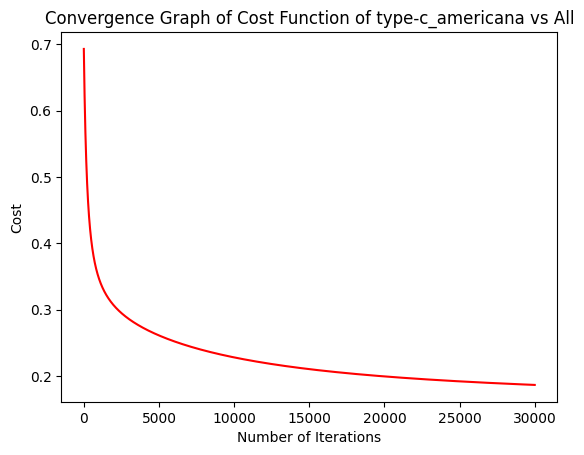

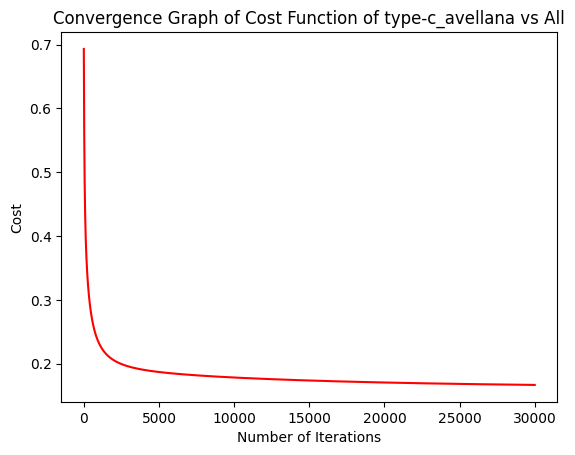

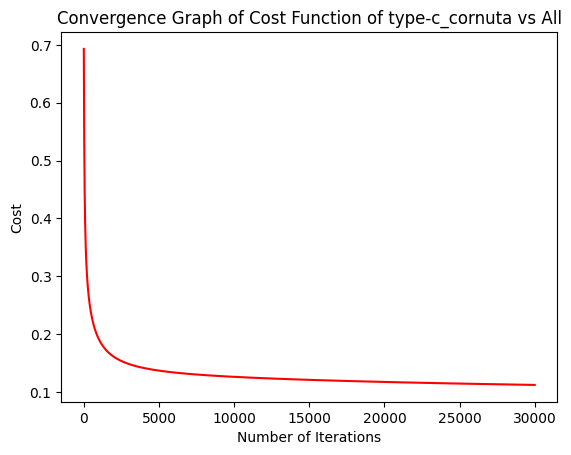

In [ ]:
from sklearn.model_selection import train_test_split
scores = []
for _ in range (10):
    X_train,X_test,y_train,y_test = train_test_split(X,y_data,test_size = 0.33)
    logi = LogisticRegression(n_iteration=30000).fit(X_train, y_train)
    predition1 = logi.predict(X_test)
    score1 = logi.score(X_test,y_test)
    print("the accuracy of the model is ",score1)
    scores.append(score1)

print(np.mean(scores))
logi._plot_cost(logi.cost) # Here we ae plotting the Cost value and showing how it is depreciating close to 0 with each iteration